In [1]:
#!pip install emoji 

In [2]:
# pandas and numpy
import pandas as pd
import numpy as numpy

# punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

# textblob
from textblob import TextBlob

# countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# gensim
import gensim
from gensim import models

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import emoji

import re

In [3]:
congress_tweets = pd.read_csv("116th Congressional Tweets and Demographics.csv")
congress_tweets = congress_tweets.dropna(subset = ['text']).reset_index()
# fill in this line of code with a sufficient number of tweets, depending on your computational resources
congress_tweets.head()

,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
0,0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
1,1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
2,2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
3,3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
4,4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"


In [4]:
numpy.random.seed(44)
congress_tweets = congress_tweets.sample(frac=0.001, random_state=1)
congress_tweets.head()

,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
217331,217331,1.174780e+18,RepValDemings,2019-09-19T16:10:19-04:00,Thank you for testifying today Mr. Blake. http...,Val Demings,Rep,3-Jan-17,3/12/1957,F,FL,10,Democrat,"4,617,886","4,504,975","4,237,756","4,163,447"
258764,258764,1.139590e+18,RepHankJohnson,2019-06-14T14:05:48-04:00,My Twitter Town Hall on healthcare has begun a...,Hank Johnson,Rep,3-Jan-07,10/2/1954,M,GA,4,Democrat,"2,089,104","1,877,963","1,773,827","2,078,688"
50091,50091,1.217600e+18,RepFrenchHill,2020-01-15T19:02:21-05:00,Scipio Jones‘ fight for civil rights and equal...,French Hill,Rep,3-Jan-15,12/5/1956,M,AR,2,Republican,"684,872","380,494","394,409","647,744"
205601,205601,1.120440e+18,RepTedDeutch,2019-04-22T17:49:57-04:00,There is no better time to #ActOnClimate than ...,Ted Deutch,Rep,13-Apr-10,5/7/1966,M,FL,22,Democrat,"4,617,886","4,504,975","4,237,756","4,163,447"
85993,85993,1.167160e+18,RepLaMalfa,2019-08-29T15:43:43-04:00,I understand the VA often has problems recruit...,Doug LaMalfa,Rep,3-Jan-13,7/2/1960,M,CA,1,Republican,"4,483,814","8,753,792","7,854,285","4,839,958"


In [5]:
nlp = en_core_web_sm.load()
##cfpb['tokens'] = cfpb['Consumer complaint narrative'].map(lambda x: rem_punc_stop(x))
#congress_tweets['text_parsed'] = congress_tweets['text'].apply(nlp)

In [6]:
def remove_emojis(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" #emoticons  
        u"\U0001F300-\U0001F5FF" #symbols & pictographs 
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #flags(iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"   
        "]+", 
        flags=re.UNICODE,)
    return emoji_pattern.sub(r"", string)

In [7]:
congress_tweets['deEmojify'] = congress_tweets['text'].map(lambda x: remove_emojis(x))

In [8]:
print(congress_tweets.iloc[5]['deEmojify'])

RT @Johnson4Dallas This is the most accurate description of the current City of Dallas budget debate (and surrounding noise) that I have read thus far. Kudos to the author for helping to arm the residents of Dallas with actual facts instead of useless political gossip. https://texasscorecard.com/commentary/montoya-citizens-matter-not-city-hall-brawls/


In [9]:
#Removing new line
congress_tweets["deEmojify"] = congress_tweets["deEmojify"].str.replace('\n','')
#Removing New Line Breaks
congress_tweets["deEmojify"] = congress_tweets["deEmojify"].str.replace('•','')



In [10]:
def rem_punc_stop(text):
    stop_words = STOP_WORDS 
    nlp.Defaults.stop_words |= {"amp", "RT", "\n"}
    punc = set(punctuation)
    
    punc_free = "".join([ch for ch in text if ch not in punc])
    
    doc = nlp(punc_free)
    
    spacy_words = [token.text for token in doc]
    
    spacy_words = [word for word in spacy_words if not word.startswith('http')]
    
    no_punc = [word for word in spacy_words if word not in stop_words]
    
    return no_punc

In [11]:
congress_tweets['tokens'] = congress_tweets['deEmojify'].map(lambda x: rem_punc_stop(x))
congress_tweets['tokens']

217331    [Thank, testifying, today, Mr, Blake, QT, JRBl...
258764    [My, Twitter, Town, Hall, healthcare, begun, I...
50091     [Scipio, Jones, ‘, fight, civil, rights, equal...
205601    [There, better, time, ActOnClimate, EarthDay, ...
85993     [I, understand, VA, problems, recruiting, qual...
                                ...                        
849015    [Thank, air, traffic, controllers, flight, att...
402238    [LawrenceGenHosp, new, coronavirus, community,...
349360    [senatemajldr, If, House, musters, courage, st...
65615     [It, important, support, policies, promote, pu...
356055    [davidmgoodwin, CDCgov, It, argument, giving, ...
Name: tokens, Length: 947, dtype: object

In [12]:
#print(congress_tweets.iloc[5]['tokens']) - for viewing one cell in the dataframe

In [13]:
#testing to see all text
text = ' '.join(congress_tweets['tokens'].map(lambda text: ' '.join(text)))
text

'Thank testifying today Mr Blake QT JRBlake RepValDemings gave impassioned speech place experience having served 27 years police force   Thank My Twitter Town Hall healthcare begun I m answering questions live Please hit w AskHank Scipio Jones ‘ fight civil rights equality important Arkansas history deeply proud LittleRock I like thank GOPoversight quickly marking legislation pass House Floor 22 There better time ActOnClimate EarthDay We role play protecting Earth It responsibility important neglect I understand VA problems recruiting qualified physicians I m working VA personnel craft legislation help hiring process alleviate concerns Johnson4Dallas This accurate description current City Dallas budget debate surrounding noise I read far Kudos author helping arm residents Dallas actual facts instead useless political gossip Instead solving problem President kicked road executive orders As new month comes millions Americans pushed deeper debt   facing prospect thrown homeshttpstwitterco

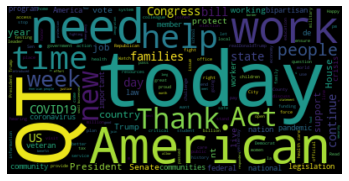

In [14]:
text = ' '.join(congress_tweets['tokens'].map(lambda text: ' '.join(text)))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
#bow_vector = CountVectorizer(tokenizer = rem_punc_stop, ngram_range=(1,1))

In [16]:
#bow_matrix = bow_vector.fit_transform(congress_tweets['text'])

In [17]:
#bow_matrix.todense()

In [18]:
#feature_names = bow_vector.get_feature_names()
#feature_names[0:10]